In [1]:
import matplotlib.pyplot as plt
import xarray

from rio_tiler.io.xarray import XarrayReader

### MUR SST

In [2]:
ds = xarray.open_dataset(
    "https://mur-sst.s3.us-west-2.amazonaws.com/zarr-v1",
    engine="zarr",
    decode_coords="all",
    consolidated=True,
)
ds

<xarray.Dataset> Size: 117TB
Dimensions:           (time: 6443, lat: 17999, lon: 36000)
Coordinates:
  * lat               (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.98 89.99
  * lon               (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0
  * time              (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020...
Data variables:
    analysed_sst      (time, lat, lon) float64 33TB ...
    analysis_error    (time, lat, lon) float64 33TB ...
    mask              (time, lat, lon) float32 17TB ...
    sea_ice_fraction  (time, lat, lon) float64 33TB ...
Attributes: (12/47)
    Conventions:                CF-1.7
    Metadata_Conventions:       Unidata Observation Dataset v1.0
    acknowledgment:             Please acknowledge the use of these data with...
    cdm_data_type:              grid
    comment:                    MUR = "Multi-scale Ultra-high Resolution"
    creator_email:              ghrsst@podaac.jpl.nasa.gov
    ...                         ...
    summary:                    A merged, multi-sensor L4 Foundation SST anal...
    time_coverage_end:          20200116T210000Z
    time_coverage_start:        20200115T210000Z
    title:                      Daily MUR SST, Final product
    uuid:                       27665bc0-d5fc-11e1-9b23-0800200c9a66
    westernmost_longitude:      -180.0

In [3]:
da = ds["analysed_sst"]
da

<xarray.DataArray 'analysed_sst' (time: 6443, lat: 17999, lon: 36000)> Size: 33TB
[4174832052000 values with dtype=float64]
Coordinates:
  * lat      (lat) float32 72kB -89.99 -89.98 -89.97 ... 89.97 89.98 89.99
  * lon      (lon) float32 144kB -180.0 -180.0 -180.0 ... 180.0 180.0 180.0
  * time     (time) datetime64[ns] 52kB 2002-06-01T09:00:00 ... 2020-01-20T09...
Attributes:
    comment:        "Final" version using Multi-Resolution Variational Analys...
    long_name:      analysed sea surface temperature
    standard_name:  sea_surface_foundation_temperature
    units:          kelvin
    valid_max:      32767
    valid_min:      -32767

In [7]:
da = ds["analysed_sst"]

# Make sure we have a valid CRS
crs = da.rio.crs or "epsg:4326"
da.rio.write_crs(crs, inplace=True)

# Select the first time stamp
da = da.isel(time=0)

with XarrayReader(da) as dst:
    print(dst.info())
    print(dst.minzoom, dst.maxzoom)

bounds=BoundingBox(left=-179.99500549324037, bottom=-89.99499786365084, right=180.0050000000763, top=89.99499786365084) crs='http://www.opengis.net/def/crs/EPSG/0/4326' band_metadata=[] band_descriptions=[] dtype='float64' nodata_type='Nodata' colorinterp=None scales=None offsets=None colormap=None name='analysed_sst' count=1 width=36000 height=17999 attrs={'comment': '"Final" version using Multi-Resolution Variational Analysis (MRVA) method for interpolation', 'long_name': 'analysed sea surface temperature', 'standard_name': 'sea_surface_foundation_temperature', 'units': 'kelvin', 'valid_max': 32767, 'valid_min': -32767}
0 6


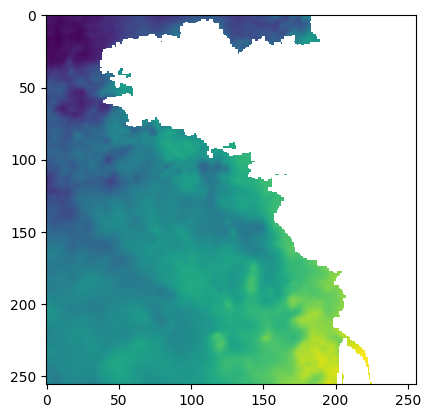

In [13]:
with XarrayReader(da) as dst:
    img = dst.tile(31, 22, 6)

plt.imshow(img.data_as_image());